<a href="https://colab.research.google.com/github/DifKiG/SQL-PYTHON-IBM/blob/main/SQL_PYTHON_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to the database

Let us first load the SQL extension and establish a connection with the database
The syntax for connecting to magic sql using sqllite is

### %sql sqlite://DatabaseName

where DatabaseName will be your .db file

In [ ]:
!pip install ipython-sql
!pip install seaborn
import seaborn as sns
%load_ext sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [ ]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install pandas

%sql sqlite:///socioeconomic.db

In [ ]:
import pandas
df= pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con , if_exists='replace', index=False,method="multi")

78

In [ ]:
#install the 'ipython-sql' and 'prettytable' libreries using pip
!pip install ipython-sql prettytable

# Import the 'prettytable' library, wich is used to display data in a formatted table
import prettytable

# Set the default  display format for 'prettytable' to 'DEFAULT'(i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

In [ ]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
#how many rows are in the dataset?

%sql SELECT count(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [ ]:
# how many community areas in Chicago have a hardship index greater than 50.0?

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [ ]:
#what is the maximum value of hardship index in this dataset

%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [ ]:
# Which community area which has the highest hardship index?

%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


 * sqlite:///socioeconomic.db
Done.


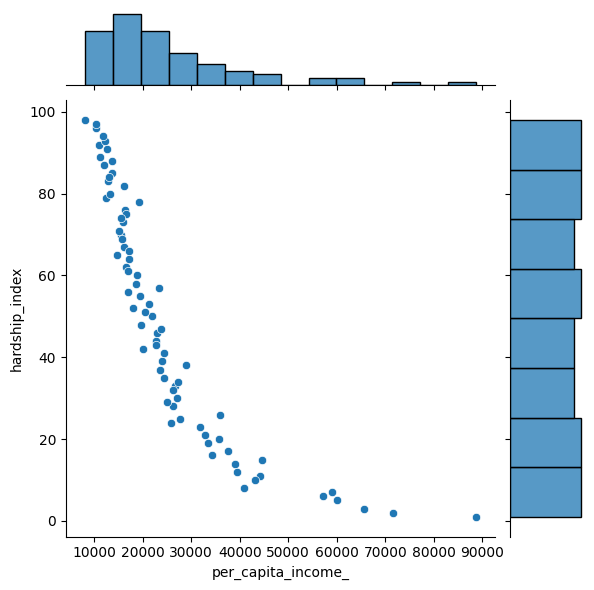

In [ ]:
#Create a scatter plot using the variables per_capita_income_ and hardship_index Explain the correlation between the two variables

!pip install matplotlib seaborn
income_vs_hardship = %sql SELECT per_capita_income_,hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())

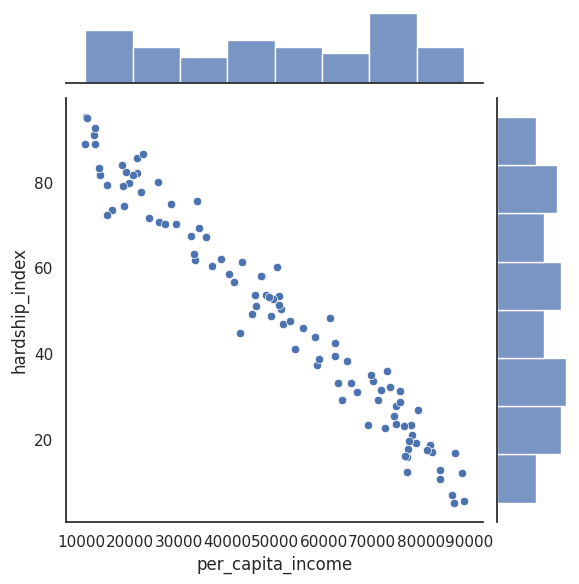

Coeficiente de correlación: -0.98


In [ ]:
# 1. Instalar librerías
!pip install seaborn matplotlib

# 2. Importar dependencias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3. Crear datos ficticios
np.random.seed(42)

# Simulamos 100 "barrios"
per_capita_income = np.random.randint(10000, 90000, 100)  # ingresos entre 10k y 90k
# Creamos una correlación negativa fuerte
hardship_index = 100 - (per_capita_income / 1000) + np.random.normal(0, 5, 100)

# 4. Crear DataFrame
df = pd.DataFrame({
    "per_capita_income": per_capita_income,
    "hardship_index": hardship_index
})

# 5. Graficar
sns.set(style="white", color_codes=True)
sns.jointplot(
    x="per_capita_income",
    y="hardship_index",
    data=df,
    kind="scatter",
    height=6
)

plt.show()

# 6. Calcular correlación
corr = df["per_capita_income"].corr(df["hardship_index"])
print(f"Coeficiente de correlación: {corr:.2f}")


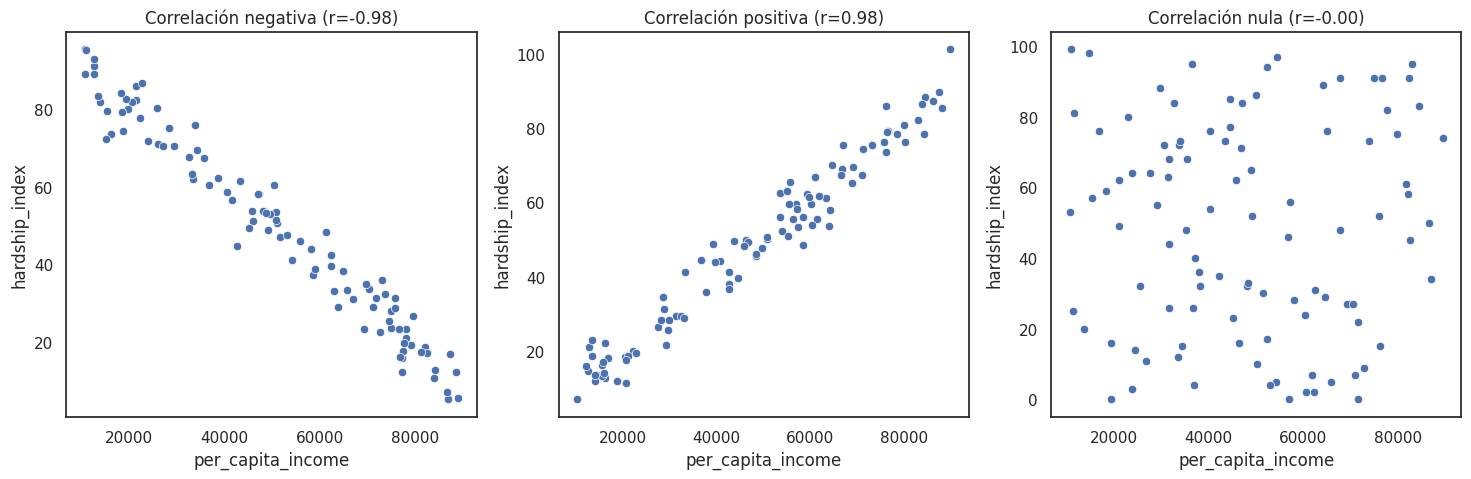

In [ ]:
# 1. Instalar librerías
!pip install seaborn matplotlib

# 2. Importar dependencias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="white", color_codes=True)
np.random.seed(42)

# ---------
# Crear tres conjuntos de datos
# ---------

n = 100

# Correlación NEGATIVA fuerte
income_neg = np.random.randint(10000, 90000, n)
hardship_neg = 100 - (income_neg / 1000) + np.random.normal(0, 5, n)
df_neg = pd.DataFrame({"per_capita_income": income_neg, "hardship_index": hardship_neg})

# Correlación POSITIVA fuerte
income_pos = np.random.randint(10000, 90000, n)
hardship_pos = (income_pos / 1000) + np.random.normal(0, 5, n)
df_pos = pd.DataFrame({"per_capita_income": income_pos, "hardship_index": hardship_pos})

# Sin correlación (NULA)
income_null = np.random.randint(10000, 90000, n)
hardship_null = np.random.randint(0, 100, n)
df_null = pd.DataFrame({"per_capita_income": income_null, "hardship_index": hardship_null})

# ---------
# Graficar en 3 columnas
# ---------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Negativa
sns.scatterplot(
    x="per_capita_income",
    y="hardship_index",
    data=df_neg,
    ax=axes[0]
)
axes[0].set_title(f"Correlación negativa (r={df_neg['per_capita_income'].corr(df_neg['hardship_index']):.2f})")

# Positiva
sns.scatterplot(
    x="per_capita_income",
    y="hardship_index",
    data=df_pos,
    ax=axes[1]
)
axes[1].set_title(f"Correlación positiva (r={df_pos['per_capita_income'].corr(df_pos['hardship_index']):.2f})")

# Nula
sns.scatterplot(
    x="per_capita_income",
    y="hardship_index",
    data=df_null,
    ax=axes[2]
)
axes[2].set_title(f"Correlación nula (r={df_null['per_capita_income'].corr(df_null['hardship_index']):.2f})")

plt.show()

